# SALES PREDICTION

### Problem Statement
We are to build a model which predicts sales based on the money spent on different platforms for marketing.

### Data
The advertising dataset from Industries.Co will be used to analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable

### Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
import copy, math
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

### Loading the Dataset

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Inspecting the Dataset

In [3]:
data.shape

(200, 4)

In [4]:
data.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

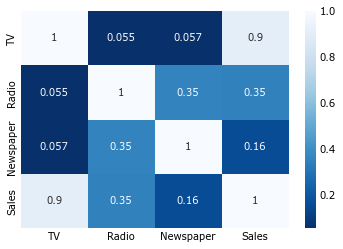

In [11]:
import seaborn as sns
sns.heatmap(data.corr(), cmap='Blues_r', annot=True)

### Data Visualization

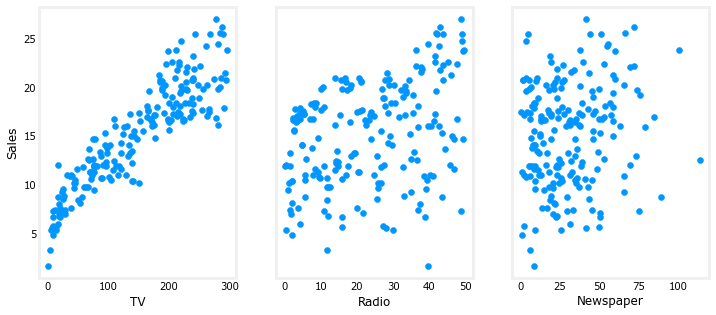

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Sales")
plt.show()

In [18]:
# import seaborn as sns
# sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
# plt.show()

### Creating the feature and target variables

In [19]:
X_train = data.iloc[:, :3]
y_train = data.iloc[:, 3]
X_train = X_train.values
y_train = y_train.values

In [20]:
X_features = ['TV','Radio','Newspaper']

### Parameter vector w(weights) and b(bias)

In [24]:
w_init = np.zeros(3)
b_init = 0.2

### Computing the Cost Function

In [25]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [26]:
print('X_train:', X_train[:5])
print('y_train:', y_train[:5])
print('w_init:', w_init)
print('b_init:', b_init)

X_train: [[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]
y_train: [22.1 10.4 12.  16.5 17.9]
w_init: [0. 0. 0.]
b_init: 0.2


In [27]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 125.34987500000003


### Computing the Gradient Descent

In [28]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

### Compute and display gradient

In [29]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -14.930499999999995
dj_dw at initial w,b: 
 [-2602.2   -374.63  -474.27]


### Gradient Descent with multiple variables

In [30]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [32]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"w, b found by gradient descent: {w_final}, {b_final:0.2f} ")

Iteration    0: Cost   124.73   
Iteration 1000: Cost     5.46   
Iteration 2000: Cost     4.52   
Iteration 3000: Cost     4.01   
Iteration 4000: Cost     3.72   
Iteration 5000: Cost     3.53   
Iteration 6000: Cost     3.41   
Iteration 7000: Cost     3.31   
Iteration 8000: Cost     3.24   
Iteration 9000: Cost     3.18   
w, b found by gradient descent: [0.07 0.12 0.05], 0.01 


### plot cost versus iteration

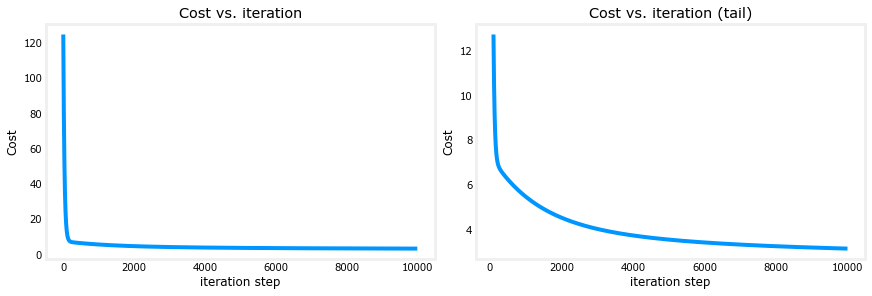

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

### Printing the first five results of the prediction

In [56]:
print(f"1st prediction: {np.dot(X_train[0], w_final) + b_final:0.2f}, 1st target value: {y_train[0]}")
print(f"2nd prediction: {np.dot(X_train[1], w_final) + b_final:0.2f}, 2nd target value: {y_train[1]}")
print(f"3rd prediction: {np.dot(X_train[2], w_final) + b_final:0.2f}, 3rd target value: {y_train[2]}")
print(f"4th prediction: {np.dot(X_train[3], w_final) + b_final:0.2f}, 4th target value: {y_train[3]}")
print(f"5th prediction: {np.dot(X_train[4], w_final) + b_final:0.2f}, 5th target value: {y_train[4]}")

1st prediction: 23.74, 1st target value: 22.1
2nd prediction: 9.94, 2nd target value: 10.4
3rd prediction: 10.05, 3rd target value: 12.0
4th prediction: 18.20, 4th target value: 16.5
5th prediction: 16.64, 5th target value: 17.9


In [57]:
# m = X_train.shape[0]
# for i in range(m):
#     print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

### Random predictions

In [60]:
X = np.array([230.0, 38, 69])
X_1 = np.random.randn(3)

In [61]:
print(f"prediction: {np.dot(X, w_final) + b_final:0.2f}")
print(f"prediction: {np.dot(X_1, w_final) + b_final:0.2f}")

prediction: 23.75
prediction: -0.24


### Feature Scaling
The technique to be used is called z-score normalization. After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

In [131]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

### Normalizing the original features

In [132]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Original        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [147.04  23.26  30.55], 
X_sigma = [85.64 14.81 21.72]
Peak to Peak range by column in Original        X:[295.7  49.6 113.7]
Peak to Peak range by column in Normalized X:[3.45 3.35 5.23]


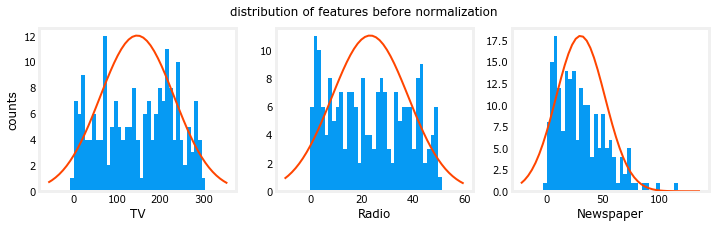

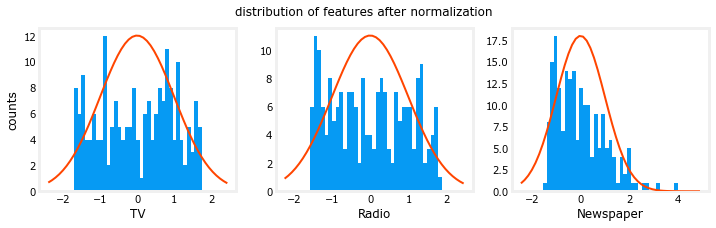

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i], X_train[:, i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("counts");
fig.suptitle("distribution of features before normalization")
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i], X_norm[:, i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("counts"); 
fig.suptitle("distribution of features after normalization")

plt.show()

In [86]:
# initialize parameters
initial_w = np.zeros(3)
initial_b = 0.
# some gradient descent settings
iterations = 100000
alpha = 0.003
# run gradient descent 
w_final_norm, b_final_norm, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"w, b found by gradient descent: {w_final_norm}, {b_final_norm:0.2f}")

Iteration    0: Cost   127.59   
Iteration 10000: Cost     1.35   
Iteration 20000: Cost     1.35   
Iteration 30000: Cost     1.35   
Iteration 40000: Cost     1.35   
Iteration 50000: Cost     1.35   
Iteration 60000: Cost     1.35   
Iteration 70000: Cost     1.35   
Iteration 80000: Cost     1.35   
Iteration 90000: Cost     1.35   
w, b found by gradient descent: [4.66 1.58 0.01], 15.13


### Predicting Target using Normalized Features

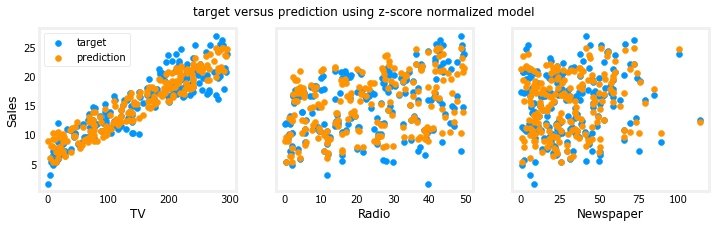

In [134]:
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_final_norm) + b_final_norm

       
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], yp, color=dlc["dlorange"], label = 'prediction')
ax[0].set_ylabel("Sales")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

### Printing the first five results of the prediction

In [135]:
print(f"1st prediction: {np.dot(X_norm[0], w_final_norm) + b_final_norm:0.2f}, 1st target value: {y_train[0]}")
print(f"2nd prediction: {np.dot(X_norm[1], w_final_norm) + b_final_norm:0.2f}, 2nd target value: {y_train[1]}")
print(f"3rd prediction: {np.dot(X_norm[2], w_final_norm) + b_final_norm:0.2f}, 3rd target value: {y_train[2]}")
print(f"4th prediction: {np.dot(X_norm[3], w_final_norm) + b_final_norm:0.2f}, 4th target value: {y_train[3]}")
print(f"5th prediction: {np.dot(X_norm[4], w_final_norm) + b_final_norm:0.2f}, 5th target value: {y_train[4]}")

1st prediction: 21.22, 1st target value: 22.1
2nd prediction: 11.27, 2nd target value: 10.4
3rd prediction: 10.50, 3rd target value: 12.0
4th prediction: 17.31, 4th target value: 16.5
5th prediction: 15.64, 5th target value: 17.9


### Random predictions

In [136]:
# X = np.array([230.0, 38, 69])
X = X_train[3]
X_norm_1, X_mu, X_sigma = zscore_normalize_features(X)
X_norm_1 = (X - X_mu) / X_sigma
print(X_norm_1)
X_1 = np.random.randn(3)
X_1_norm, X_mu, X_sigma = zscore_normalize_features(X_1)
X_1_norm = (X_1 - X_mu) / X_sigma
print(X_1_norm)
print(f"prediction: {np.dot(X_norm_1, w_final_norm) + b_final_norm:0.2f}")
print(f"prediction: {np.dot(X_1_norm, w_final_norm) + b_final_norm:0.2f}")

[ 1.4  -0.88 -0.52]
[ 1.11  0.2  -1.31]
prediction: 20.26
prediction: 20.63


In [142]:
# m = X_norm.shape[0]
# for i in range(m):
#     print(f"prediction: {np.dot(X_norm[i], w_final_norm) + b_final_norm:0.2f}, target value: {y_train[i]}")